In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 22
matplotlib.rcParams['ytick.labelsize']= 22
matplotlib.rcParams['axes.labelsize']= 22
matplotlib.rcParams.update({'font.size': 22})
import matplotlib as mpl

import sys
sys.path.insert(0,"/home/albert/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma


In [2]:
ds_hgradT_JFM=xr.open_dataset('/media/extra/DATA/TSG/ALL_temperature_gradients_1x1_JFM.nc')
ds_hgradS_JFM=xr.open_dataset('/media/extra/DATA/TSG/ALL_salinity_gradients_1x1_JFM.nc')
ds_hgradb_JFM=xr.open_dataset('/media/extra/DATA/TSG/ALL_buoyancy_gradients_1x1_JFM.nc')


In [3]:
ds_hgradT_JAS=xr.open_dataset('/media/extra/DATA/TSG/ALL_temperature_gradients_1x1_JAS.nc')
ds_hgradS_JAS=xr.open_dataset('/media/extra/DATA/TSG/ALL_salinity_gradients_1x1_JAS.nc')
ds_hgradb_JAS=xr.open_dataset('/media/extra/DATA/TSG/ALL_buoyancy_gradients_1x1_JAS.nc')


In [5]:
hgradT_JFM=ds_hgradT_JFM['SST_LS']
hgradS_JFM=ds_hgradS_JFM['SSS_LS']
hgradb_JFM=ds_hgradb_JFM['SSb_LS']


In [6]:
hgradT_JAS=ds_hgradT_JAS['SST_LS']
hgradS_JAS=ds_hgradS_JAS['SSS_LS']
hgradb_JAS=ds_hgradb_JAS['SSb_LS']


In [4]:
def add_map(lon_min=-180, lon_max=180, lat_min=-90, lat_max=90,
            central_longitude=0., scale='auto', ax=None):
    """
    Add the map to the existing plot using cartopy

    Parameters
    ----------
    lon_min : float, optional
        Western boundary, default is -180
    lon_max : float, optional
        Eastern boundary, default is 180
    lat_min : float, optional
        Southern boundary, default is -90
    lat_max : float, optional
        Northern boundary, default is 90
    central_longitude : float, optional
        Central longitude, default is 180
    scale : {‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ‘high, ‘full’}, optional
        The map scale, default is 'auto'
    ax : GeoAxes, optional
        A new GeoAxes will be created if None

    Returns
    -------
    ax : GeoAxes
    Return the current GeoAxes instance
    """
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    extent = (lon_min, lon_max, lat_min, lat_max)
    if ax is None:
        ax = plt.subplot(1, 1, 1,
                         projection=ccrs.PlateCarree(
	                                       central_longitude=central_longitude))
    ax.set_extent(extent)
    land = cfeature.GSHHSFeature(scale=scale,
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


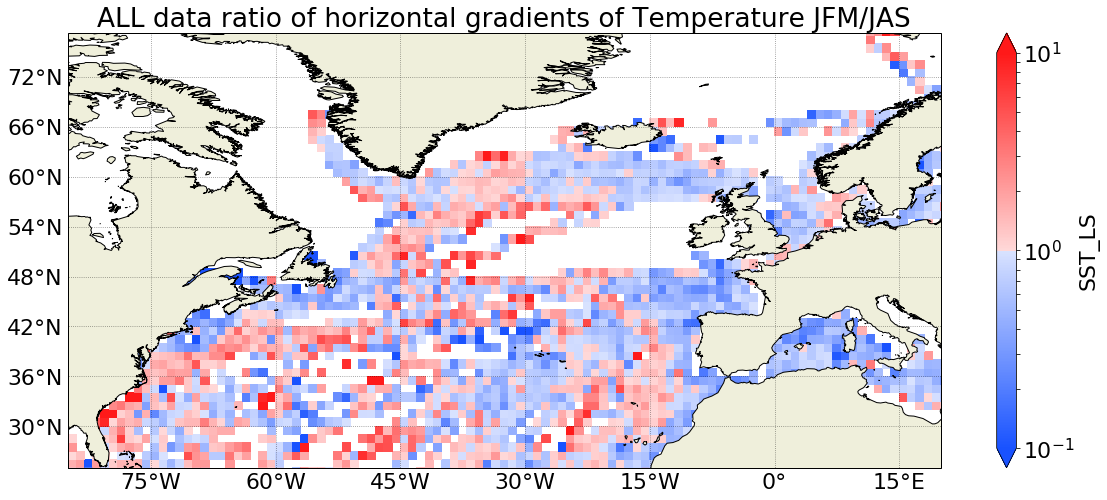

In [5]:
ax=add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
JFM=ds_hgradT_JFM['SST_LS']
JAS=ds_hgradT_JAS['SST_LS']
ratio_hgradT=JFM/JAS
cmap=cmclimate.cm.BlueRed
norm=matplotlib.colors.LogNorm()
pcolor=ratio_hgradT.plot.pcolormesh(cmap=cmap, norm=norm, extend='both',vmin=0.1, vmax=10)
plt.title('ALL data ratio of horizontal gradients of Temperature JFM/JAS')
plt.savefig('ALL_data_TSG_T_gradients_JFM-JAS_1x1.png', dpi=300, bbox_inches='tight')

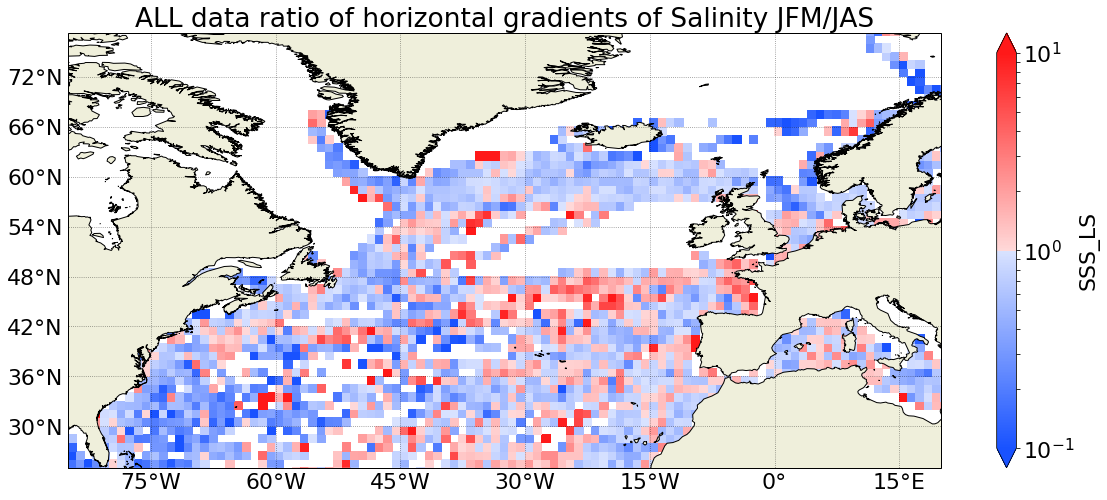

In [7]:
ax=add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
JFM=ds_hgradS_JFM['SSS_LS']
JAS=ds_hgradS_JAS['SSS_LS']
ratio_hgradS=JFM/JAS

pcolor=ratio_hgradS.plot.pcolormesh(cmap=cmap, norm=norm, extend='both',vmin=0.1, vmax=10)
plt.title('ALL data ratio of horizontal gradients of Salinity JFM/JAS')
plt.savefig('ALL_data_TSG_S_gradients_JFM-JAS_1x1.png', dpi=300, bbox_inches='tight')

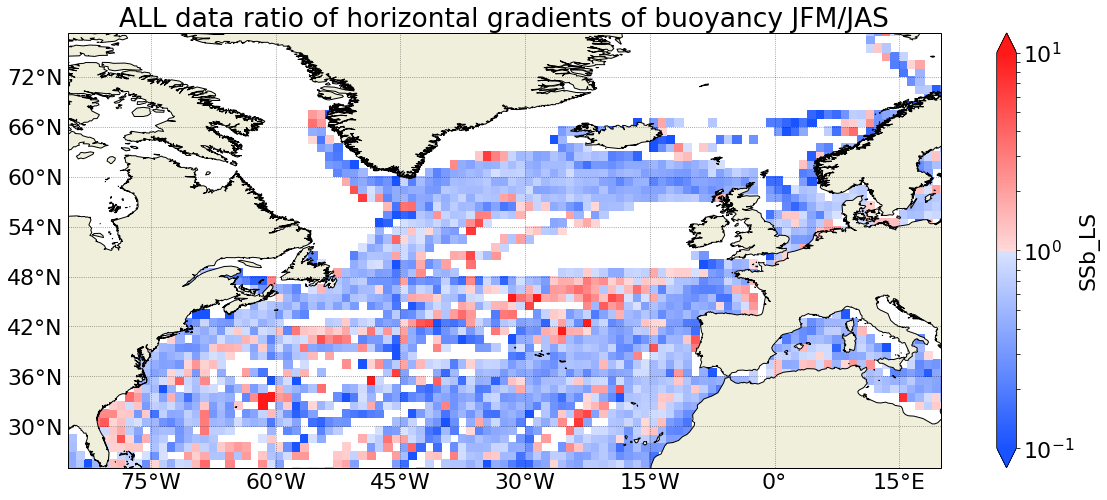

In [8]:
ax=add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
JFM=ds_hgradb_JFM['SSb_LS']
JAS=ds_hgradb_JAS['SSb_LS']
ratio_hgradb=JFM/JAS

pcolor=ratio_hgradb.plot.pcolormesh(cmap=cmap, norm=norm, extend='both',vmin=0.1, vmax=10)
plt.title('ALL data ratio of horizontal gradients of buoyancy JFM/JAS')
plt.savefig('ALL_data_TSG_buoy_gradients_JFM-JAS_1x1.png', dpi=300, bbox_inches='tight')